In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [26]:
df = pd.read_csv('Exp.txt', sep=',', header=None, names=["Col1", "Col2", "Col3", "target"])
df.head()

,Col1,Col2,Col3,target
0,0.57,-0.08,0.27,0
1,-0.60,-0.77,0.68,2
2,-0.57,0.94,0.67,1
3,0.92,-0.06,0.32,0
4,-0.14,-0.76,-0.11,2


In [36]:

Column_1 = df['Col1']
Column_2 = df['Col2']
Column_3 = df['Col3']
y = df['target']


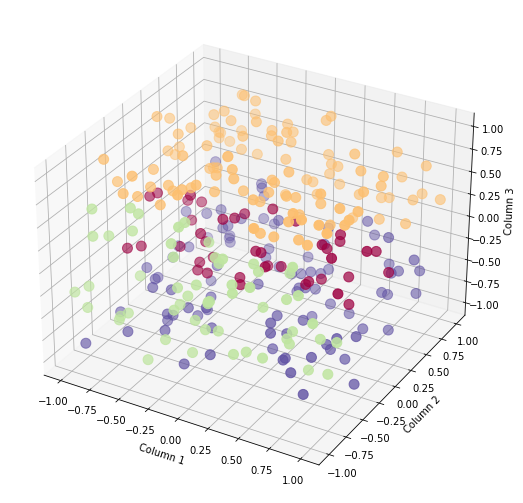

In [37]:
fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(projection='3d')

ax.scatter(Column_1, Column_2, Column_3, c=y, marker='o', s=100, cmap="Spectral")

ax.set_xlabel('Column 1')
ax.set_ylabel('Column 2')
ax.set_zlabel('Column 3')

plt.show()


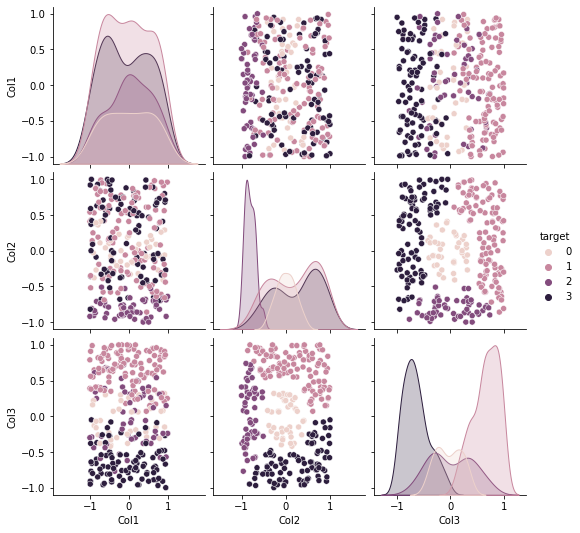

In [38]:
sns.pairplot(df, hue="target")  
plt.show()

The intersection of Column 3 and Column 2 is most informative.

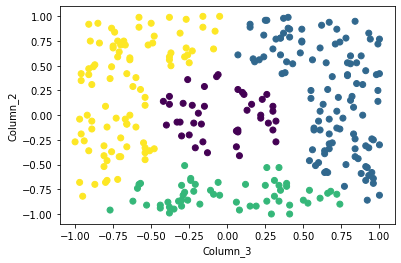

In [39]:
c = df['target']
plt.scatter(Column_3, Column_2, c = y)
plt.xlabel('Column_3')
plt.ylabel('Column_2')
plt.show()

In [40]:
X = np.column_stack((Column_3, Column_2))
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


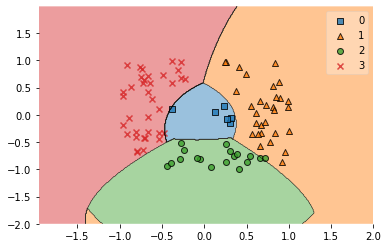

In [41]:
C = 1.0
rbf = svm.SVC(kernel = 'rbf', gamma=0.7, C = C)
rbf.fit(X_train, y_train)
rbfAccuracy = rbf.score(X_test, y_test)
plot_decision_regions(X_test, y_test, clf=rbf, legend=1)
plt.show()

The RBF kernel was more accurate than linear and poly kernels.

In [42]:
y_pred = rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  0  0  0]
 [ 0 30  0  0]
 [ 0  1 17  0]
 [ 0  0  0 36]]


In [43]:
a=np.sum(cm)
np.fill_diagonal(cm,0)
b=np.sum(cm)

In [44]:
minimumEmpiricalRisk=(b/a)
print("The minimum empirical risk is: ")
minimumEmpiricalRisk

The minimum empirical risk is: 


0.011111111111111112